# Experimentos: Baseline com QSVM

Este notebook estabelece baselines de performance com QSVM em datasets

Usando PCA.


# Dataset = Breast Cancer Wisconsin (Diagnostic)

In [14]:
from sklearn.datasets import load_breast_cancer 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

#Ferramentas quânticas 
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import StatevectorSampler    
from qiskit_machine_learning.kernels import FidelityQuantumKernel  
from qiskit_machine_learning.algorithms import QSVC
import time

from sklearn.decomposition import PCA


## Loading data and initial analysis

In [15]:
# 2. loading data
X, y = load_breast_cancer(return_X_y=True)
feature_names = load_breast_cancer().feature_names
df_X = pd.DataFrame(X, columns=feature_names)

print(f"Dataset carregado com {X.shape[0]} amostras e {X.shape[1]} features.")

Dataset carregado com 569 amostras e 30 features.


## Split data into training and testing sets

In [16]:
X_train_full, X_test_full, y_train, y_test = train_test_split(
    df_X, y, test_size=0.25, random_state=42, stratify=y
)
print("Dados divididos em treino e teste.")

Dados divididos em treino e teste.


## Normalize data

In [17]:
# normalizing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test_full)
print("Dados normalizados.")





Dados normalizados.


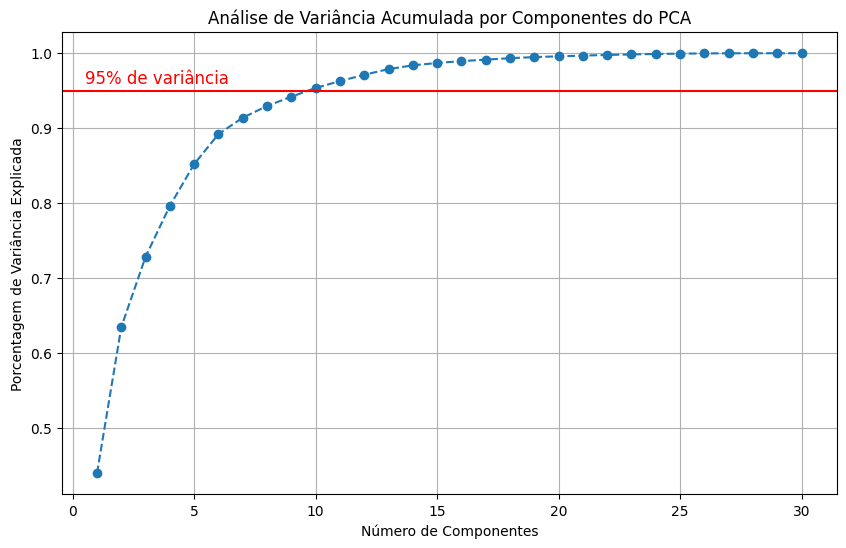

In [18]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Usando os dados de treino normalizados
# Vamos criar uma instância do PCA sem definir o número de componentes
pca_analise = PCA()
pca_analise.fit(X_train_scaled)

# Calculando a variância acumulada
variancia_acumulada = np.cumsum(pca_analise.explained_variance_ratio_)

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(variancia_acumulada) + 1), variancia_acumulada, marker='o', linestyle='--')
plt.title('Análise de Variância Acumulada por Componentes do PCA')
plt.xlabel('Número de Componentes')
plt.ylabel('Porcentagem de Variância Explicada')
plt.grid(True)
# Adicionando uma linha para os 95% de variância
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.96, '95% de variância', color = 'red', fontsize=12)
plt.show()

## aplying PCA

In [19]:
N_COMPONENTES = 10
pca = PCA(n_components=N_COMPONENTES)

X_train_pca = pca.fit_transform(X_train_scaled)

X_test_pca = pca.transform(X_test_scaled)

print(f"PCA aplicado. Dimensões reduzidas para {N_COMPONENTES} componentes.")
print("Novo formato de X_train_pca:", X_train_pca.shape)


PCA aplicado. Dimensões reduzidas para 10 componentes.
Novo formato de X_train_pca: (426, 10)


# Training QSVM model with PCA

In [ ]:

num_features_pca = X_train_pca.shape[1]

feature_map_pca = ZZFeatureMap(feature_dimension=num_features_pca, reps=1)
fidelity_kernel_pca = FidelityQuantumKernel(feature_map=feature_map_pca)
qsvc_bc_pca = QSVC(quantum_kernel=fidelity_kernel_pca, random_state=42)

print("Modelo QSVC + PCA criado.")

start_time = time.time()
qsvc_bc_pca.fit(X_train_pca, y_train)
end_time = time.time()
print(f"Modelo treinado em {end_time - start_time:.2f} segundos.")

qsvc_bc_predictions_pca = qsvc_bc_pca.predict(X_test_pca)

print("\n--- Relatório de Classificação para o QSVM com PCA (Breast Cancer) ---")
print(classification_report(y_test, qsvc_bc_predictions_pca, target_names=load_breast_cancer().target_names))
